### Dataset: Employee Future Prediction
[Dataset en Kaggle](https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)

In [37]:
# importaciones
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# leyendo el dataset
empleados = pd.read_csv('../data/Employee.csv')

# chequeando que estén todos los datos
empleados

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [77]:
# Chequeando por duplicados
duplicados = empleados.duplicated().sum()
duplicados

1889

In [81]:
# Eliminando duplicados
empleados = empleados.drop_duplicates()
empleados.shape

(2764, 9)

## 010 - Relación entre educación (Education) y categoría de pago (PaymentTier)
> Con este análisis, buscamos investigar si hay alguna relación entre el tipo de educación de un empleado con la categoría de pago en la que se encuentra.
>
> **Hipótesis**: Mayor educación = Categoría de pago más alta.


<table align='center'>
<tr>
<th> Educación </th>
<th> Categoría de pago </th>
</tr>
<tr>
<td>

- PhD = 1
- Masters = 2
- Bachelors = 3

PhD > Masters > Bachelors


</td>
<td>

- 1 (Categoría más alta)
- 2 
- 3 (Categoría más baja)

</td>
</tr>
</table>




 


In [53]:
# Tipos de Educacion
empleados['Education'].unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [54]:
# Tipos de PaymentTier
empleados['PaymentTier'].unique()

array([3, 1, 2], dtype=int64)

In [55]:
# Cambiamos los tipos de educación por números para poder aplicar la función de correlación
edu_num = {'Bachelors':3,
            'Masters':2,
            'PHD': 1
        }

In [85]:
empleados.loc[:,'EduNum'] = empleados['Education'].map(edu_num) 
empleados

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,EduNum
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,2013,Pune,1,28,Female,No,3,1,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,3
3,Masters,2016,Bangalore,3,27,Male,No,5,1,2
4,Masters,2017,Pune,3,24,Male,Yes,2,1,2
...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0,2
4647,Bachelors,2016,Pune,3,30,Male,No,2,0,3
4649,Masters,2013,Pune,2,37,Male,No,2,1,2
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,2


In [96]:
empleados_num = empleados.select_dtypes(np.number)
corr_matrix = empleados_num.corr()
corr_matrix.style.apply(lambda x: ['background: blue' if x.name == 'EduNum' else '' for i in x], 
               axis=0)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,EduNum
JoiningYear,1.000000,-0.053823,0.024445,-0.031228,0.150650,-0.113858
PaymentTier,-0.053823,1.000000,0.067514,-0.004602,-0.119891,0.071380
Age,0.024445,0.067514,1.000000,-0.053276,-0.114943,0.107324
ExperienceInCurrentDomain,-0.031228,-0.004602,-0.053276,1.000000,-0.021181,-0.043842
LeaveOrNot,0.150650,-0.119891,-0.114943,-0.021181,1.000000,-0.019661
EduNum,-0.113858,0.071380,0.107324,-0.043842,-0.019661,1.000000


In [93]:
# Para verlo aislado
rel_edu_pay = empleados[['EduNum', 'PaymentTier']].copy()
rel_edu_pay.corr()

,EduNum,PaymentTier
EduNum,1.00000,0.07138
PaymentTier,0.07138,1.00000


**No se observa correlación.**

En la primer tabla podemos ver que el tipo de educación (EduNum) tiene una relación baja con la edad y una relación baja negativa con el año de ingreso; pero no existe relación con la categoría de pago.

Para visualizarlo mejor, realizaremos un gráfico

In [ ]:
# 
f = plt.figure(figsize=(19, 15))
plt.matshow(empleados_num.corr(), fignum=f.number)
plt.xticks(range(empleados_num.select_dtypes(['number']).shape[1]), empleados_num.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(empleados_num.select_dtypes(['number']).shape[1]), empleados_num.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [52]:
bachelors = len(empleados[(empleados['Education']=='Bachelors')])
masters = len(empleados[(empleados['Education']=='Masters')])
phd = len(empleados[(empleados['Education']=='PHD')])

print(f'Bachelors: {bachelors}\nMasters: {masters}\nPHD: {phd}')

Bachelors: 1971
Masters: 637
PHD: 156


Como se puede observar hay un desequilibrio en los tipos de educación, para poder determinar si existe correlación o no primero tednríamos que equilibrarlos.
Vamos a ver en porcentajes cada uno de los subgrupos

In [74]:
df = empleados.groupby(['Education', 'PaymentTier']).size().to_frame('Total').reset_index()
education_count = df.groupby('Education')['Total'].sum()

df['Percentage'] = df.apply(lambda x: f'{(x["Total"] / education_count[x["Education"]]) * 100:.2f}%', axis=1)

df

,Education,PaymentTier,Total,Percentage
0,Bachelors,1,150,7.61%
1,Bachelors,2,336,17.05%
2,Bachelors,3,1485,75.34%
3,Masters,1,54,8.48%
4,Masters,2,215,33.75%
5,Masters,3,368,57.77%
6,PHD,1,14,8.97%
7,PHD,2,19,12.18%
8,PHD,3,123,78.85%


In [68]:

df = empleados.groupby(['Education', 'PaymentTier']).size().to_frame('Count').reset_index()

education_counts = df.groupby('Education')['Count'].sum()


df['Percentage'] = df.apply(lambda x: f'{(x["Count"] / education_counts[x["Education"]]) * 100:.2f}%', axis=1)

styled_df = df.style.background_gradient(cmap='PRGn_r')


styled_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'to_frame'

In [ ]:
df = empleados.groupby(['Education','PaymentTier'])['Education'].value_counts().to_frame().reset_index()
df.loc[:, 'Percentage'] = df.apply(lambda x: f'{x["count"]/x["Education"].value_counts()}%')
df = df.style.background_gradient(cmap='PRGn_r')
df

In [56]:
df.columns

Index(['count'], dtype='object')

In [32]:
bachelors = empleados.groupby('PaymentTier')['Education'].value_counts()
bachelors

PaymentTier  Education
1            Bachelors     173
             Masters        56
             PHD            14
2            Bachelors     543
             Masters       355
             PHD            20
3            Bachelors    2885
             Masters       462
             PHD           145
Name: count, dtype: int64

(9,)

In [ ]:
df['Percentage'] = df.apply(lambda x: f'{x["Education"]/}%')

ValueError: could not convert string to float: 'Bachelors'

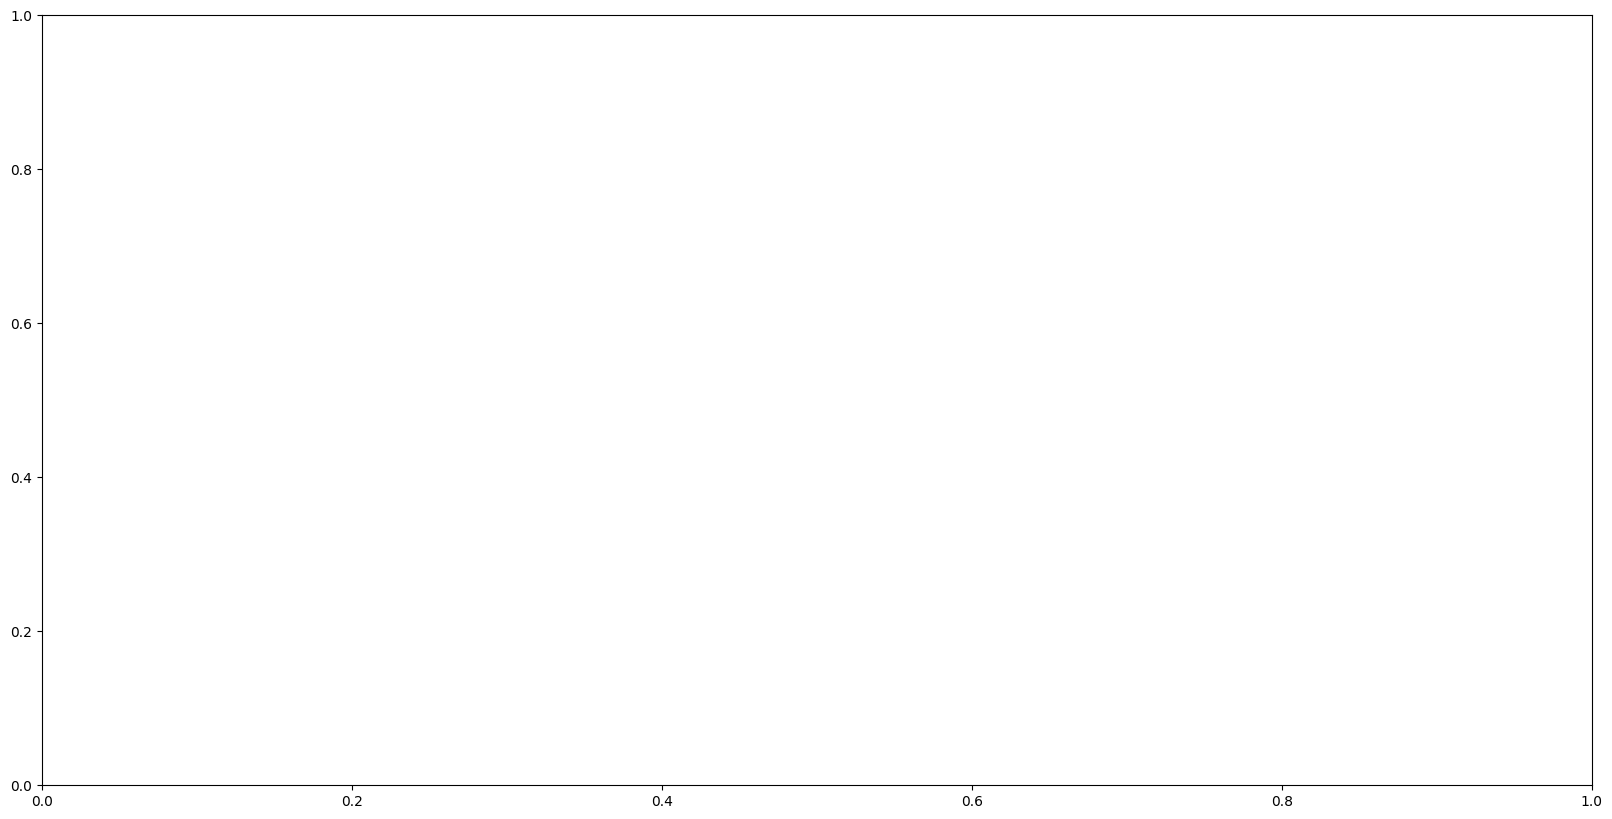

In [38]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = empleados.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()